# Visualizing Joern Graphs

In [17]:
import pandas as pd

In [18]:
ilp_data = pd.read_csv("../data/ilp_dataset.csv.gz")
ilp_data = ilp_data.drop('Unnamed: 0', axis='columns')

In [19]:
ilp_data

,testcase_ID,filename,code,flaw,flaw_loc,bug,code_length
0,62804,000/062/804/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,False,1722
1,62852,000/062/852/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,False,1674
2,62869,000/062/869/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,32,False,1760
3,62900,000/062/900/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,False,1680
4,232012,000/232/012/CWE122_Heap_Based_Buffer_Overflow_...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-122,31,False,1723
5,-62804,000/062/804/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,True,1618
6,-62852,000/062/852/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,True,1570
7,-62869,000/062/869/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,32,True,1616
8,-62900,000/062/900/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,True,1576
9,-232012,000/232/012/CWE122_Heap_Based_Buffer_Overflow_...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-122,31,True,1619


Now do it for all our examples:

In [46]:
import os
import subprocess
import tempfile

In [47]:
testcase_IDs = []
flaws = []
bugs = []
code_lengths = []
trees = []

In [48]:
def generate_dot(testcase):
    tmp_dir = tempfile.TemporaryDirectory()

    for file in testcase.itertuples():
        short_filename = file.filename.split("/")[-1]
        with open(tmp_dir.name + "/" + short_filename, 'w') as f:
            f.write(file.code)

    subprocess.check_call(["/joern/joern-parse", "--out", tmp_dir.name + "/cpg.bin.zip", tmp_dir.name])

    tree = subprocess.check_output(
        "cd /joern && /joern/joern-query --cpg "+tmp_dir.name + "/cpg.bin.zip -f /project/code/joern_cfg_to_dot.scala",
        shell=True,
        universal_newlines=True,
    )

    testcase_IDs.append(file.testcase_ID)
    flaws.append(file.flaw)
    bugs.append(file.bug)
    code_lengths.append(file.code_length)
    trees.append(tree)

    tmp_dir.cleanup()

In [49]:
ilp_data.groupby('testcase_ID').apply(generate_dot)

""


In [65]:
dot = pd.DataFrame({
    'testcase_ID': testcase_IDs,
    'flaw': flaws,
    'bug': bugs,
    'code_length': code_lengths,
    'dot': trees,
})
dot = dot[1:11]  # when we run apply it duplicates the first group
dot

,testcase_ID,flaw,bug,code_length,dot
1,-232012,CWE-122,True,1619,"digraph g {\n# AST\n{\n edge[color=green3,con..."
2,-62900,CWE-121,True,1576,"digraph g {\n# AST\n{\n edge[color=green3,con..."
3,-62869,CWE-121,True,1616,"digraph g {\n# AST\n{\n edge[color=green3,con..."
4,-62852,CWE-121,True,1570,"digraph g {\n# AST\n{\n edge[color=green3,con..."
5,-62804,CWE-121,True,1618,"digraph g {\n# AST\n{\n edge[color=green3,con..."
6,62804,CWE-121,False,1722,"digraph g {\n# AST\n{\n edge[color=green3,con..."
7,62852,CWE-121,False,1674,"digraph g {\n# AST\n{\n edge[color=green3,con..."
8,62869,CWE-121,False,1760,"digraph g {\n# AST\n{\n edge[color=green3,con..."
9,62900,CWE-121,False,1680,"digraph g {\n# AST\n{\n edge[color=green3,con..."
10,232012,CWE-122,False,1723,"digraph g {\n# AST\n{\n edge[color=green3,con..."


In [51]:
dot.to_csv("../data/ilp_data_as_dot.csv.gz")

Generate a PNG from one example using the `dot` program.

In [52]:
print(dot['dot'][1])

digraph g {
# AST
{
  edge[color=green3,constraint=true]
  82 -> 185 
   70 -> 185 
   68 -> 185 
   66 -> 185 
   60 -> 185 
   57 -> 185 
   50 -> 185 
   48 -> 185 
   47 -> 185 
   46 -> 185 
   44 -> 185 
   39 -> 185 
   36 -> 185 
   35 -> 185 
   30 -> 185 
   98 -> 185 
   97 -> 185 
   96 -> 185 
   95 -> 185 
   94 -> 185 
   93 -> 185 
   92 -> 185 
   177 -> 184 
   178 -> 184 
   179 -> 184 
   180 -> 184 
   181 -> 184 
   182 -> 184 
   12 -> 125 
   5 -> 125 
   8 -> 68 
   16 -> 44 
   3 -> 46 
   9 -> 70 
   7 -> 60 
   19 -> 60 
   18 -> 48 
   11 -> 82 
   23 -> 39 
   4 -> 50 
   15 -> 35 
   14 -> 68 
   21 -> 57 
   1 -> 57 
   24 -> 30 
   13 -> 44 
   22 -> 36 
   20 -> 57 
   6 -> 47 
   17 -> 66 
   10 -> 35 
   2 -> 39 
   79 -> 39 
   26 -> 39 
   75 -> 39 
   25 -> 39 
   58 -> 46 
   63 -> 46 
   85 -> 46 
   45 -> 44 
   90 -> 44 
   86 -> 44 
   56 -> 44 
   87 -> 82 
   53 -> 82 
   78 -> 82 
   29 -> 66 
   52 -> 66 
   31 -> 66 
   38 -> 57 
   34 -

In [62]:
tmp_dir = tempfile.TemporaryDirectory()

with open(tmp_dir.name + "/example.dot", 'w') as f:
    f.write(dot['dot'][1])
    
subprocess.check_call([
    "dot", "-O", "-Tpng", tmp_dir.name + "/example.dot"])
subprocess.check_call([
    "dot", "-O", "-Tsvg", tmp_dir.name + "/example.dot"])

0

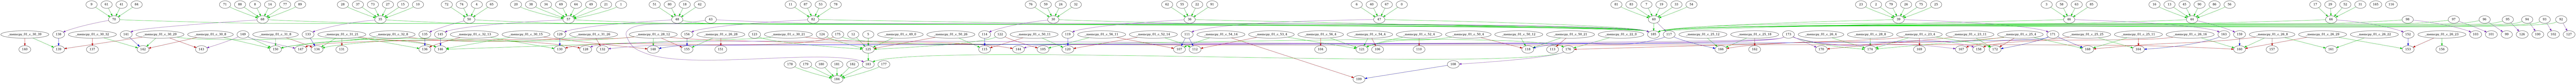

In [64]:
from IPython.display import Image
Image(filename=tmp_dir.name + "/example.dot.png")

In [58]:
tmp_dir.name + "/example.dot.svg"

'/tmp/tmpbpe08am8/example.dot.svg'

In [60]:
dot['testcase_ID'][1]

-232012

In [61]:
!cp '/tmp/tmpbpe08am8/example.dot.svg' '../data/testcase_-232012_cfg_graph.svg'